# Analytical Exploration of Boston Crime Statistics (2012-2015)

## Content 

    1. Introduction
    2. Import
    3. Read Data
    4. Clean Data
    5. Analyze and 
    6. Add weather data/clean

# 1. Introduction

This is an updated versionof  an EDA I previously did last year (2017) using the same data set. This EDA examines the crime statistic from 2012 to 2015 using data provided by data.boston.gov. <Expand later>

# 2. Import

In [1]:
# To explicitly display dataframe 
from IPython.display import display

# numpy for math and pandas for data processing
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plt.style.use("seaborn")
sns.set_theme("darkgrid")

# 3. Read Data

In [2]:
# Stores the data in a variable called data
# dtype={"SHIFT": "string"} to avoid DtypeWarning
# parse_date to note have to convert later
part1 = pd.read_csv("./data/crime-incident-reports-2012-2015.csv", dtype={"SHIFT": "string"}, parse_dates=['FROMDATE'], error_bad_lines=False)
part2 = pd.read_csv("./data/crime-incident-reports-2015.csv", dtype={"SHIFT": "string"}, parse_dates=['OCCURRED_ON_DATE'], error_bad_lines=False)

# Show top 5 rows
display(part1.head())
display(part2.head())

print ("Dataset ready..")

COMPNOS NatureCode INCIDENT_TYPE_DESCRIPTION MAIN_CRIMECODE  \
0  120420285.0     BERPTA      RESIDENTIAL BURGLARY           05RB   
1  120419202.0     PSHOT         AGGRAVATED ASSAULT           04xx   
2  120419213.0     ARMROB                   ROBBERY           03xx   
3  120419223.0     ALARMC       COMMERCIAL BURGLARY           05CB   
4  120419236.0     ARMROB                   ROBBERY           03xx   

  REPTDISTRICT  REPORTINGAREA            FROMDATE WEAPONTYPE Shooting  \
0           D4            629 2012-07-08 06:00:00      Other       No   
1           B2            327 2012-07-08 06:03:00    Firearm      Yes   
2           D4            625 2012-07-08 06:26:00    Firearm       No   
3           B2            258 2012-07-08 06:56:00      Other       No   
4          E18            496 2012-07-08 07:15:00    Firearm       No   

  DOMESTIC SHIFT  Year  Month DAY_WEEK   UCRPART            X            Y  \
0       No  Last  2012      7   Sunday  Part One  763273.1791  2951498.962   
1       No  Last  2012      7   Sunday  Part One  771223.1638  2940772.099   
2       No  Last  2012      7   Sunday  Part One  765118.8605  2950217.536   
3       No  Last  2012      7   Sunday  Part One  773591.8648  2940638.174   
4       No  Last  2012      7   Sunday  Part One  759042.7315  2923832.681   

    STREETNAME     XSTREETNAME                     Location  
0  ABERDEEN ST             NaN  (42.34638135, -71.10379454)  
1    HOWARD AV             NaN  (42.31684135, -71.07458456)  
2    JERSEY ST  QUEENSBERRY ST  (42.34284135, -71.09698955)  
3  COLUMBIA RD             NaN   (42.3164411, -71.06582908)  
4   COLLINS ST             NaN  (42.27051636, -71.11989955)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I192068249          2647              Other   
1      I192061894          1106   Confidence Games   
2      I192038828          1107              Fraud   
3      I192008877          1107              Fraud   
4      I182090828          1102              Fraud   

               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0        THREATS TO DO BODILY HARM       B2            280      NaN   
1  FRAUD - CREDIT CARD / ATM FRAUD      C11            356      NaN   
2            FRAUD - IMPERSONATION       A1            172      NaN   
3            FRAUD - IMPERSONATION      E18            525      NaN   
4  FRAUD - FALSE PRETENSE / SCHEME       D4            159      NaN   

     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART         STREET  \
0 2015-08-28 10:20:00  2015      8      Friday    10  Part Two  WASHINGTON ST   
1 2015-08-20 00:00:00  2015      8    Thursday     0  Part Two     CHARLES ST   
2 2015-11-02 12:24:00  2015     11      Monday    12  Part Two      ALBANY ST   
3 2015-07-31 10:00:00  2015      7      Friday    10  Part Two     WINGATE RD   
4 2015-12-01 12:00:00  2015     12     Tuesday    12  Part Two       UPTON ST   

         Lat       Long                     Location  
0  42.330119 -71.084251  (42.33011862, -71.08425106)  
1  42.300605 -71.061268  (42.30060543, -71.06126785)  
2  42.334288 -71.072395  (42.33428841, -71.07239518)  
3  42.237009 -71.129566  (42.23700950, -71.12956606)  
4  42.342432 -71.072258  (42.34243222, -71.07225766)

Dataset ready..


# 4. Clean Data and Combine


In [3]:
# Remove columns that we most likely won't use for this EDA
# I wanted to use X and Y instead of location but the numbers weren't formatted correctly
part1 = part1.drop(["COMPNOS", "NatureCode", "MAIN_CRIMECODE", "REPORTINGAREA", "WEAPONTYPE", "DOMESTIC",
                  "SHIFT", "UCRPART", "XSTREETNAME", "X", "Y"], axis = 1)

# legacy system did not have column for Hour
part1.insert(loc = 7, column = 'Hour', value = part1['FROMDATE'].dt.hour)

# Since 2012 doesn't start until July, we will drop it
part1 = part1.loc[ part1['FROMDATE'].dt.year > 2012 ]

part1['Location'] = part1.Location.str.replace("(", "").str.replace(")", "")
part1[['Lat','Long']] = part1.Location.str.split(", ", expand=True) 

part2 = part2.drop(["INCIDENT_NUMBER", "OFFENSE_CODE", "OFFENSE_CODE_GROUP", "REPORTING_AREA",
                  "UCR_PART"], axis = 1)
part2["SHOOTING"] = part2["SHOOTING"].fillna("No")
part2["SHOOTING"] = part2["SHOOTING"].replace("Y", "Yes")

rename1 = {'INCIDENT_TYPE_DESCRIPTION':'Type',
          'REPTDISTRICT':'District',
          'FROMDATE':'Date',
          'SHOOTING':'Shooting',
          'Year':'Year',
          'Month':'Month',
          'DAY_WEEK':'Day',
          'STREETNAME':'Street'}
part1.rename(index=str, columns=rename1, inplace=True)

rename2 = {'OFFENSE_DESCRIPTION':'Type',
          'DISTRICT':'District',
          'OCCURRED_ON_DATE':'Date',
          'SHOOTING':'Shooting',
          'YEAR':'Year',
          'MONTH':'Month',
          'DAY_OF_WEEK':'Day',
           'HOUR':'Hour',
          'STREET':'Street'}
part2.rename(index=str, columns=rename2, inplace=True)

# Combine
data = pd.concat([part1, part2], ignore_index=False, axis=0)

<ipython-input-3-7d8f89d7f253>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  part1['Location'] = part1.Location.str.replace("(", "").str.replace(")", "")


In [4]:
print("Dataset shape before any changes: ", data.shape)

# Remove duplicates
data.drop_duplicates(inplace=True)
print("Dataset shape after drop_duplicate: ", data.shape)

# Remove any null data but it looks like there was barely much this method took out
data = data.dropna()
print("Dataset shape after dropna: ", data.shape)

print("Columns and types after drop: ")
display(data.dtypes)

# 
# data['Lat'] = data['Lat'].apply(str)
# data['Long'] = data['Long'].apply(str)
      
print("Final dataset: ")
display(data.head(3))

Dataset shape before any changes:  (278467, 12)
Dataset shape after drop_duplicate:  (276117, 12)
Dataset shape after dropna:  (273571, 12)
Columns and types after drop: 


Type                object
District            object
Date        datetime64[ns]
Shooting            object
Year                 int64
Month                int64
Day                 object
Hour                 int64
Street              object
Location            object
Lat                 object
Long                object
dtype: object

Final dataset: 


Type District                Date Shooting  Year  Month        Day  \
13441  VAL       A1 2013-02-06 11:01:00       No  2013      2  Wednesday   
13498  VAL       C6 2013-02-08 14:15:00       No  2013      2     Friday   
13527  VAL       B2 2013-02-09 12:00:00       No  2013      2   Saturday   

       Hour       Street                   Location          Lat          Long  
13441    11     BEACH ST  42.35138634, -71.06082456  42.35138634  -71.06082456  
13498    14  ALLSTATE RD  42.32543556, -71.06387302  42.32543556  -71.06387302  
13527    12     AKRON ST   42.3257856, -71.08563716   42.3257856  -71.08563716

In [5]:
# Setting the datetimeindex to be the date
data.index = pd.DatetimeIndex(data.Date)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273571 entries, 2013-02-06 11:01:00 to 2015-07-09 13:38:00
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Type      273571 non-null  object        
 1   District  273571 non-null  object        
 2   Date      273571 non-null  datetime64[ns]
 3   Shooting  273571 non-null  object        
 4   Year      273571 non-null  int64         
 5   Month     273571 non-null  int64         
 6   Day       273571 non-null  object        
 7   Hour      273571 non-null  int64         
 8   Street    273571 non-null  object        
 9   Location  273571 non-null  object        
 10  Lat       273571 non-null  object        
 11  Long      273571 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 27.1+ MB


# 5. Exploration and Visualization
    a. Crime by District
    b. Yearly Trend
    c. By Month
    d. Day of the Week
    e. Time of the Day
    f. Frequncy of Incident type
    g. Street
    h. Shooting vs Non-shooting
    i. Map

B2     41684
D4     38351
C11    36076
A1     30561
B3     26322
C6     20920
D14    19286
E13    15234
E18    14282
A7     12983
E5     12156
A15     5708
HTU        8
Name: District, dtype: int64


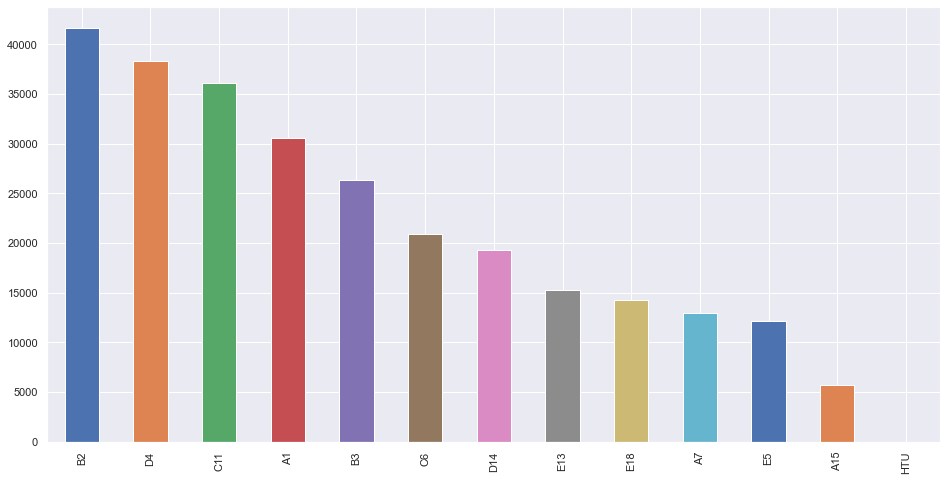

In [6]:
# a. Crime by District
print(data['District'].value_counts())

plt.figure(figsize=(16,8))
data['District'].value_counts().plot.bar(color=sns.color_palette())
plt.show()

Seems like A15, aka Charlestown, is the district with the least amount of crimes and Roxbury is on top. As a resident of Dorchester all my life, I'm surprised B3 is so low. B3, aka Mattapan, has always been refered to as "Murderpan" around my area, but it seems C11, aka Dorchester, is higher on the list.

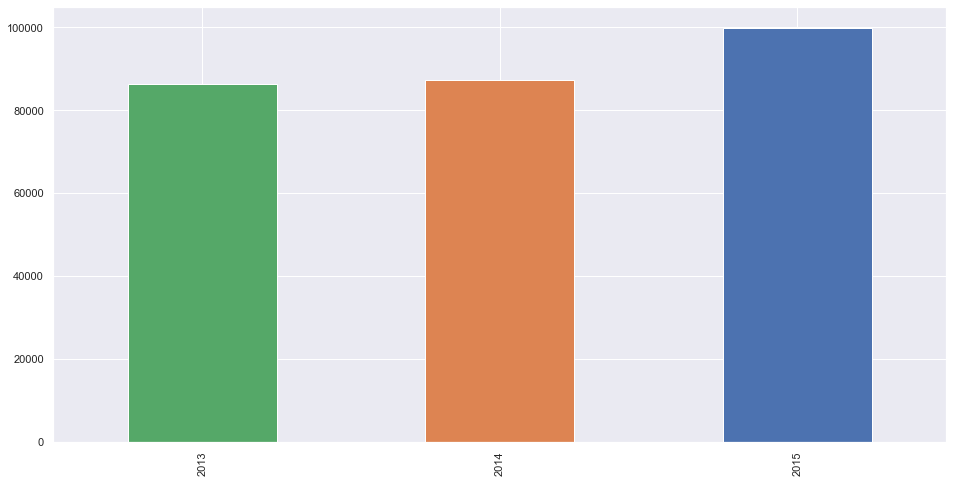

In [7]:
# b. Yearly Trend
# data['Year'].value_counts(sort = False)

plt.figure(figsize=(16,8))
data['Year'].value_counts().plot.bar(color=sns.color_palette())
plt.show()

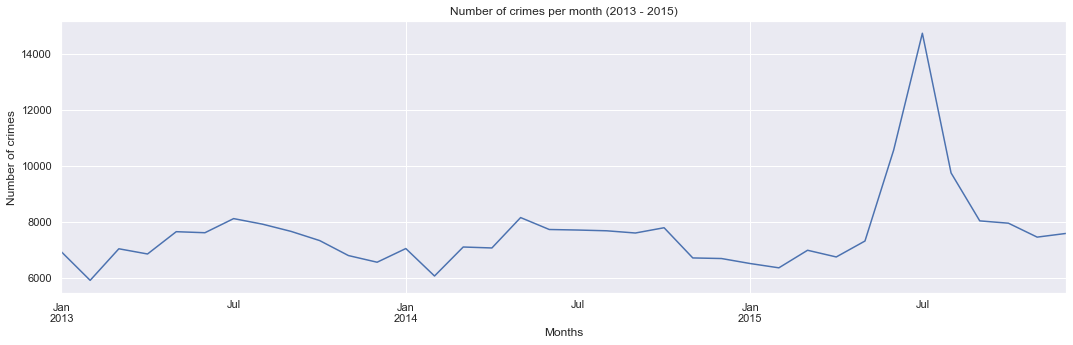

In [8]:
# c. By Month
data['Month'].value_counts()

plt.figure(figsize=(18,5))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2013 - 2015)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

I suspect the spike is overlapping data between the legacy July 2012 - August 205 and the new 2015.

Text(0.5, 1.0, 'Number of crimes by day of the week')

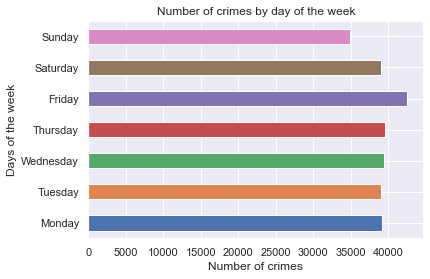

In [9]:
# d. Day of the week
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby([data.index.dayofweek]).size().plot(kind='barh', color=sns.color_palette())

plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')

# data['Day'].value_counts()

Sunday seems to be the least active, and Friday the most active, overall it's pretty consistent throughout.

Text(0.5, 1.0, 'Number of crimes by Hour')

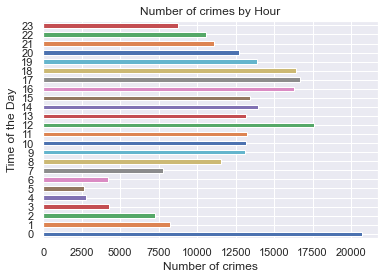

In [10]:
# e. Time of the Day
# data['Hour'].value_counts(sort = 0)
data.groupby([data.Hour]).size().plot(kind='barh', color=sns.color_palette())

plt.ylabel('Time of the Day')
plt.yticks(np.arange(24))
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Hour')

# plt.figure(figsize=(18,5))
# plt.title('Time of the Day')
# plt.xlabel('Time')
# plt.ylabel('Number of crimes')
# plt.show()

# data.plot.scatter(x='Hour')

I would take the above data with a grain of salt, it's possible that for some of the rows, 0 is suppose to be null rather than 00:00. 

Taking that out of consideration, crime is most active between between 16:00 - 18:00 and least active between 04:00 - 05:00.

In [11]:
# f. Frequncy of Incident type
data['Type'].value_counts().nlargest(10)

VAL                           23146
OTHER LARCENY                 20089
SIMPLE ASSAULT                14816
MedAssist                     14616
VANDALISM                     13466
MVAcc                         11341
InvPer                        10957
LARCENY FROM MOTOR VEHICLE    10073
DRUG CHARGES                   9383
FRAUD                          7373
Name: Type, dtype: int64

In [12]:
data['Type'].value_counts().nsmallest(10).sort_values(ascending=False)

DRUGS - POSS CLASS E INTENT TO MF DIST DISP    1
LARCENY OTHER UNDER $50                        1
Bomb Hoax                                      1
LARCENY NON-ACCESSORY FROM VEH. $50 TO $199    1
BioThreat                                      1
CHILD ABUSE                                    1
B&E NON-RESIDENCE DAY - NO PROP TAKEN          1
WEAPON - FIREARM - SALE / TRAFFICKING          1
LARCENY BICYCLE $200 & OVER                    1
A&B ON POLICE OFFICER                          1
Name: Type, dtype: int64

In [13]:
# g. Street
data['Street'].value_counts().nlargest(10)

WASHINGTON ST       14268
BOYLSTON ST          6831
BLUE HILL AV         5111
TREMONT ST           4435
CENTRE ST            3883
DORCHESTER AV        3826
MASSACHUSETTS AV     3594
COMMONWEALTH AV      3492
COLUMBIA RD          2651
HARRISON AV          2524
Name: Street, dtype: int64

I've lived off of both Blue Hill ave and Dorchester ave for the majority of my life and fully expected both to be in the top 5. No surprise at all. 

Shooting    0.256241
dtype: float64


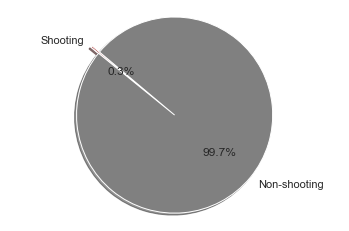

0.5757604836388063


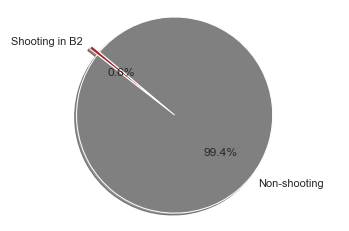

0.1121222393157936


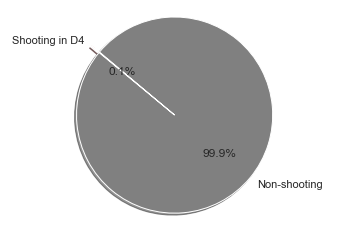

0.37975385297704845


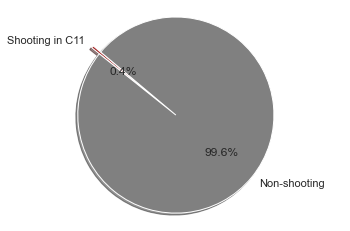

In [14]:
# h. Shooting vs Non-shooting
print((data[data['Shooting'] == 'Yes'].count()['Shooting'] / data[['Shooting']].count()) * 100)
 
# Data to plot
labels = 'Shooting', 'Non-shooting'
sizes = [(data[data['Shooting'] == 'Yes'].count()['Shooting']), (data[data['Shooting'] == 'No'].count()['Shooting'])]
colors = ['brown', 'gray', ]
explode = (0.1, 0)  # explode 1st slice
 
# Plot overall
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Plot base on top 3 district starting with B2
top = (data[(data['Shooting'] == 'Yes') & (data['District'] == 'B2')].count()['Shooting'])
bottom = (data[(data['District'] == 'B2')].count()['Shooting'])

print((top / bottom) * 100)

# Data to plot
labels = 'Shooting in B2', 'Non-shooting'
sizes = [data[(data['Shooting'] == 'Yes') & (data['District'] == 'B2')].count()['Shooting'], 
         data[(data['Shooting'] == 'No') & (data['District'] == 'B2')].count()['Shooting']]
colors = ['brown', 'gray', ]
explode = (0.1, 0)  # explode 1st slice
 
# Plot overall
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# D4
top = (data[(data['Shooting'] == 'Yes') & (data['District'] == 'D4')].count()['Shooting'])
bottom = (data[(data['District'] == 'D4')].count()['Shooting'])

print((top / bottom) * 100)

# Data to plot
labels = 'Shooting in D4', 'Non-shooting'
sizes = [data[(data['Shooting'] == 'Yes') & (data['District'] == 'D4')].count()['Shooting'], 
         data[(data['Shooting'] == 'No') & (data['District'] == 'D4')].count()['Shooting']]
colors = ['brown', 'gray', ]
explode = (0.1, 0)  # explode 1st slice
 
# Plot overall
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# C11
top = (data[(data['Shooting'] == 'Yes') & (data['District'] == 'C11')].count()['Shooting'])
bottom = (data[(data['District'] == 'C11')].count()['Shooting'])

print((top / bottom) * 100)

# Data to plot
labels = 'Shooting in C11', 'Non-shooting'
sizes = [data[(data['Shooting'] == 'Yes') & (data['District'] == 'C11')].count()['Shooting'], 
         data[(data['Shooting'] == 'No') & (data['District'] == 'C11')].count()['Shooting']]
colors = ['brown', 'gray', ]
explode = (0.1, 0)  # explode 1st slice
 
# Plot overall
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [15]:
# Map

# Weather

In [16]:
# Stores the data in a variable called data
# weather = pd.read_csv('weather.csv', encoding='latin-1')

# Show top 5 rows
# weather.head()